### Student Information
Name: 陳致寧

Student ID: 109022136

GitHub ID: nthuandrew

---

### Instructions

1. First: do the **take home** exercises in the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master). You may need to copy some cells from the Lab notebook to this notebook. __This part is worth 20% of your grade.__


2. Second: follow the same process from the [DM2023-Lab1-Master](https://github.com/fjrialdnc0615/DM2023-Lab1-Master) on **the new dataset**. You don't need to explain all details as we did (some **minimal comments** explaining your code are useful though).  __This part is worth 30% of your grade.__
    - Download the [the new dataset](https://archive.ics.uci.edu/ml/datasets/Sentiment+Labelled+Sentences#). The dataset contains a `sentence` and `score` label. Read the specificiations of the dataset for details. You need to combine three labeled datasets into one file for your data preparation part.
    - You are allowed to use and modify the `helper` functions in the folder of the first lab session (notice they may need modification) or create your own.


3. Third: please attempt the following tasks on **the new dataset**. __This part is worth 30% of your grade.__
    - Generate meaningful **new data visualizations**. Refer to online resources and the Data Mining textbook for inspiration and ideas. 
    - Generate **TF-IDF features** from the tokens of each text. This will generating a document matrix, however, the weights will be computed differently (using the TF-IDF value of each word per document as opposed to the word frequency). Refer to this Sciki-learn [guide](http://scikit-learn.org/stable/modules/generated/sklearn.feature_extraction.text.TfidfVectorizer.html) .
    - Implement a simple **Naive Bayes classifier** that automatically classifies the records into their categories. Use both the TF-IDF features and word frequency features to build two seperate classifiers. Comment on the differences.  Refer to this [article](https://hub.packtpub.com/implementing-3-naive-bayes-classifiers-in-scikit-learn/).


4. Fourth: In the lab, we applied each step really quickly just to illustrate how to work with your dataset. There are somethings that are not ideal or the most efficient/meaningful. Each dataset can be habdled differently as well. What are those inefficent parts you noticed? How can you improve the Data preprocessing for these specific datasets? __This part is worth 10% of your grade.__


5. Fifth: It's hard for us to follow if your code is messy, so please **tidy up your notebook** and **add minimal comments where needed**. __This part is worth 10% of your grade.__


You can submit your homework following these guidelines: [Git Intro & How to hand your homework](https://github.com/fjrialdnc0615/DM2023-Lab1-Master/blob/main/Git%20Intro%20%26%20How%20to%20hand%20your%20homework.ipynb). Make sure to commit and save your changes to your repository __BEFORE the deadline (October 27th 11:59 pm, Thursday)__. 

## Task 1
### Take home exercises

In [94]:
### Begin Assignment Here
# import library
import pandas as pd
import numpy as np
import nltk
from sklearn.datasets import fetch_20newsgroups
from sklearn.feature_extraction.text import CountVectorizer
import plotly as py
import math
import pickle
%matplotlib inline


In [95]:
# prepare dataset
categories = ['alt.atheism', 'soc.religion.christian', 'comp.graphics', 'sci.med']
with open('./twenty_train.pkl', 'rb') as f:
    twenty_train = pickle.load(f)

In [96]:
import pandas as pd
import helpers.data_mining_helpers as dmh

# construct dataframe from a list
X = pd.DataFrame.from_records(dmh.format_rows(twenty_train), columns= ['text'])
X['category'] = twenty_train.target
# add category label also
X['category_name'] = X.category.apply(lambda t: dmh.format_labels(t, twenty_train))

### ** >>> Exercise 2 (take home):** 
Experiment with other querying techniques using pandas dataframes. Refer to their [documentation](https://pandas.pydata.org/pandas-docs/stable/indexing.html) for more information. 

In [97]:
# get five data from backcount, which is the first column
# print(X.columns)
print(X.iloc[::-1][:3])

# fetch records belonging to the ```sci.med``` category, and query every 10th record. Only show the first 5 records.
X.loc[X['category_name'] == 'sci.med'][::10][:5]

                                                   text  category  \
2256  From: dyer@spdcc.com (Steve Dyer) Subject: Re:...         2   
2255  From: Dan Wallach <dwallach@cs.berkeley.edu> S...         2   
2254  From: sasghm@theseus.unx.sas.com (Gary Merrill...         2   

     category_name  
2256       sci.med  
2255       sci.med  
2254       sci.med  


,text,category,category_name
7,From: aldridge@netcom.com (Jacquelin Aldridge)...,2,sci.med
49,From: jimj@contractor.EBay.Sun.COM (Jim Jones)...,2,sci.med
82,From: jason@ab20.larc.nasa.gov (Jason Austin) ...,2,sci.med
118,From: rogers@calamari.hi.com (Andrew Rogers) S...,2,sci.med
142,From: lady@uhunix.uhcc.Hawaii.Edu (Lee Lady) S...,2,sci.med


### >>> **Exercise 5 (take home)** 
There is an old saying that goes, "The devil is in the details." When we are working with extremely large data, it's difficult to check records one by one (as we have been doing so far). And also, we don't even know what kind of missing values we are facing. Thus, "debugging" skills get sharper as we spend more time solving bugs. Let's focus on a different method to check for missing values and the kinds of missing values you may encounter. It's not easy to check for missing values as you will find out in a minute.

Please check the data and the process below, describe what you observe and why it happened.   
$Hint$ :  why `.isnull()` didn't work?

In [98]:
import numpy as np

NA_dict = [{ 'id': 'A', 'missing_example': np.nan },
           { 'id': 'B'                    },
           { 'id': 'C', 'missing_example': 'NaN'  },
           { 'id': 'D', 'missing_example': 'None' },
           { 'id': 'E', 'missing_example':  None  },
           { 'id': 'F', 'missing_example': ''     }]

NA_df = pd.DataFrame(NA_dict, columns = ['id','missing_example'])
NA_df

,id,missing_example
0,A,NaN
1,B,NaN
2,C,NaN
3,D,None
4,E,None
5,F,


In [99]:
NA_df['missing_example'].isnull()

0     True
1     True
2    False
3    False
4     True
5    False
Name: missing_example, dtype: bool

#### Since the data type of C, D, F are 'string', so the .isnull() function does not return True for them. For the case A, it's type NaN so it is null; for the case B, there's no corresponding value so it is null; for the case E, it's type None so it is null.

### >>> Exercise 6 (take home):
Notice any changes from the `X` dataframe to the `X_sample` dataframe? What are they? Report every change you noticed as compared to the previous state of `X`. Feel free to query and look more closely at the dataframe for these changes.

In [100]:
X_test_1 = X.sample(frac=1, random_state=1)
X_test_2 = X.sample(frac=1, random_state=2)    
print(X[:3])
print(X_test_1[:3])
print(X_test_2[:3])


                                                text  category  \
0  From: sd345@city.ac.uk (Michael Collier) Subje...         1   
1  From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...         1   
2  From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...         3   

            category_name  
0           comp.graphics  
1           comp.graphics  
2  soc.religion.christian  
                                                   text  category  \
367   From: echen@burn.ee.washington.edu (Ed Chen) S...         1   
2108  From: bobbe@vice.ICO.TEK.COM (Robert Beauchain...         0   
2170  From: naren@tekig1.PEN.TEK.COM (Naren Bala) Su...         0   

      category_name  
367   comp.graphics  
2108    alt.atheism  
2170    alt.atheism  
                                                   text  category  \
1460  From: mpaul@unl.edu (marxhausen paul) Subject:...         3   
1632  From: khan0095@nova.gmi.edu (Mohammad Razi Kha...         1   
259   From: keith@cco.caltech.edu (Keith Allan Schn

#### 從以上測試中我們可以看到，因為sample時設定frac=1，因此X, X_test_1, X_test_2都有一樣多的rows，但是sample完後卻改變了index的順序，不同的random_state也造成sample後的結果不同。

In [101]:
import matplotlib.pyplot as plt
%matplotlib inline

### >>> **Exercise 8 (take home):** 
We can also do a side-by-side comparison of the distribution between the two datasets, but maybe you can try that as an excerise. Below we show you an snapshot of the type of chart we are looking for. 

<AxesSubplot: title={'center': 'Category distribution'}>

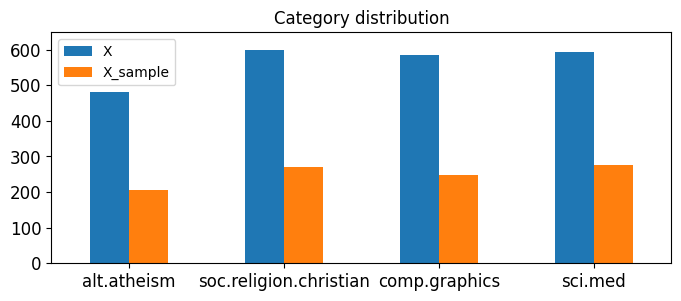

In [102]:
# plot with pandas
X_sample = X.sample(n=1000, random_state=42)
X_plot = X.category_name.value_counts()
X_sample_plot = X_sample.category_name.value_counts()
df = pd.DataFrame({'X': X_plot,
                   'X_sample': X_sample_plot},
                  index=categories)
max_X = max(X.category_name.value_counts())
max_X_sample = max(X_sample.category_name.value_counts())
df.plot(kind = 'bar',
        title = 'Category distribution',
        ylim = [0, max(max_X, max_X_sample) + 50],
        rot = 0, fontsize = 12, figsize = (8,3))

In [103]:
import nltk
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [104]:
X['unigrams'] = X['text'].apply(lambda x: dmh.tokenize_text(x))

In [105]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
X_counts = count_vect.fit_transform(X.text) #learn the vocabulary and return document-term matrix
print(X_counts.shape)
# print(X_counts[0])

(2257, 35788)


In [106]:
# We can obtain the feature names of the vectorizer, i.e., the terms
# usually on the horizontal axis
print(len(list(count_vect.get_feature_names_out())))
count_vect.get_feature_names_out()[:10]

35788


array(['00', '000', '0000', '0000001200', '000005102000', '0001',
       '000100255pixel', '00014', '000406', '0007'], dtype=object)

In [107]:
# Exercise 9
analyze = count_vect.build_analyzer()
analyze(X.text[0])

['from',
 'sd345',
 'city',
 'ac',
 'uk',
 'michael',
 'collier',
 'subject',
 'converting',
 'images',
 'to',
 'hp',
 'laserjet',
 'iii',
 'nntp',
 'posting',
 'host',
 'hampton',
 'organization',
 'the',
 'city',
 'university',
 'lines',
 '14',
 'does',
 'anyone',
 'know',
 'of',
 'good',
 'way',
 'standard',
 'pc',
 'application',
 'pd',
 'utility',
 'to',
 'convert',
 'tif',
 'img',
 'tga',
 'files',
 'into',
 'laserjet',
 'iii',
 'format',
 'we',
 'would',
 'also',
 'like',
 'to',
 'do',
 'the',
 'same',
 'converting',
 'to',
 'hpgl',
 'hp',
 'plotter',
 'files',
 'please',
 'email',
 'any',
 'response',
 'is',
 'this',
 'the',
 'correct',
 'group',
 'thanks',
 'in',
 'advance',
 'michael',
 'michael',
 'collier',
 'programmer',
 'the',
 'computer',
 'unit',
 'email',
 'collier',
 'uk',
 'ac',
 'city',
 'the',
 'city',
 'university',
 'tel',
 '071',
 '477',
 '8000',
 'x3769',
 'london',
 'fax',
 '071',
 '477',
 '8565',
 'ec1v',
 '0hb']

In [108]:
# we convert from sparse array to normal array
X_counts[0:5, 0:100].toarray()

array([[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0],
       [0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
        0, 0, 0, 0, 0,

### **>>> Exercise 10 (take home):**
We said that the `1` at the beginning of the fifth record represents the `00` term. Notice that there is another 1 in the same record. Can you provide code that can verify what word this 1 represents from the vocabulary. Try to do this as efficient as possible.

In [109]:
# get the '1' from X_counts[4, 0:100].toarray() and the corresponding word
print(count_vect.inverse_transform(X_counts[4, 0:100].toarray()))

[array(['00', '01'], dtype='<U80')]


#### Since function "inverse_transform" can transform the vector back to the original text, which is nonezero, we can use this function to find the word that the 1 represents, which is '01' in this case.

### **>>> Exercise 11 (take home):** 
From the chart above, we can see how sparse the term-document matrix is; i.e., there is only one terms with frequency of `1` in the subselection of the matrix. By the way, you may have noticed that we only selected 20 articles and 20 terms to plot the histrogram. As an excersise you can try to modify the code above to plot the entire term-document matrix or just a sample of it. How would you do this efficiently? Remember there is a lot of words in the vocab. Report below what methods you would use to get a nice and useful visualization

In [110]:
# first twenty features only
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()[0:20]]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(X.index)[0:20]]
# obtain document features
plot_z = X_counts[0:20, 0:20].toarray()

,term_00,term_000,term_0000,term_0000001200,term_000005102000,term_0001,term_000100255pixel,term_00014,term_000406,term_0007,term_000usd,term_0010,term_001004,term_0010580b,term_001125,term_001200201pixel,term_0014,term_001642,term_00196,term_002
doc_0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_2,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_3,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_4,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_5,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_6,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_7,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_8,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
doc_9,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0


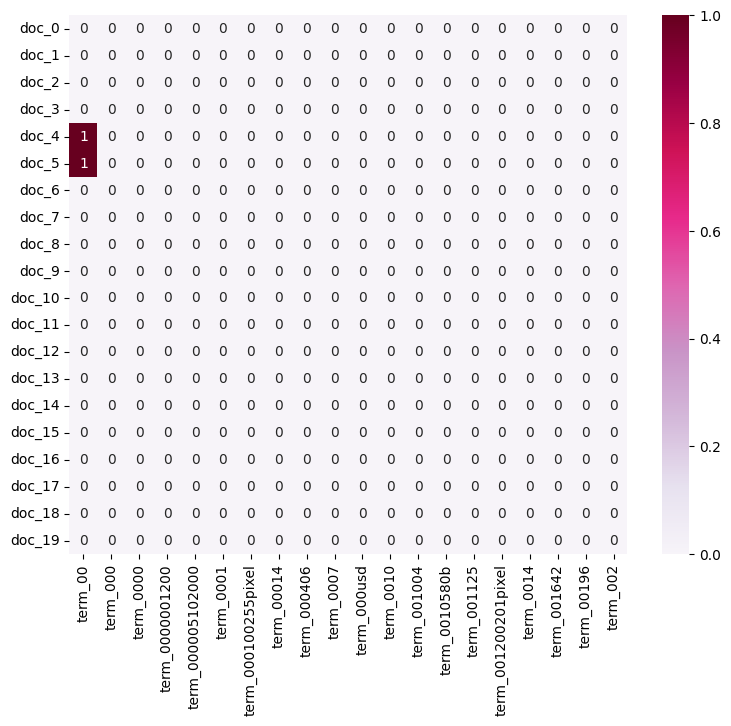

In [111]:
import seaborn as sns
# import matplotlib.pyplot as plt

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
display(df_todraw)
plt.subplots(figsize=(9, 7))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=1, annot=True)

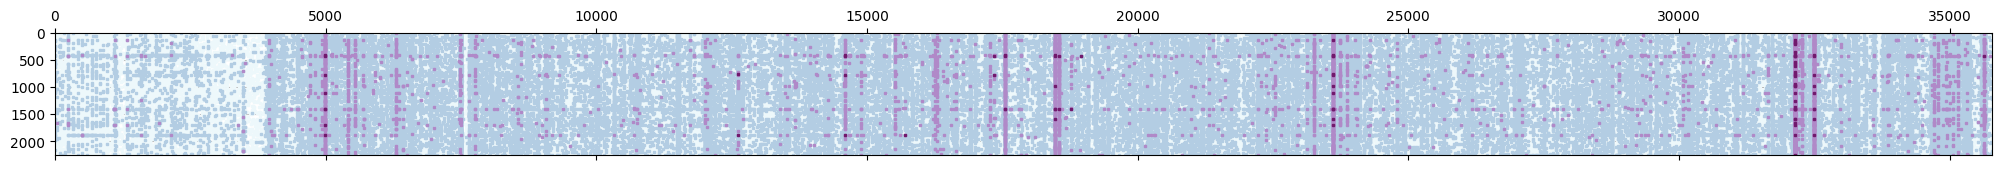

In [112]:
plt.subplots(figsize=(25, 15))
# different precisions correspond to different color
precisions = [0, 1, 10, 100]
colors = ['#edf8fb', '#b3cde3', '#b089c8', '#71196d'][:len(precisions)]

for p, c in zip(precisions, colors):
    plt.spy(X_counts, precision = p, color = c, markersize=2)
plt.grid('on')
plt.show()

#### function 'spy' is appropriate for this case, since it can show the sparsity of the matrix. The parameter 'precision' can be used to control the number of points to be shown. For example, if we set precision=1, then the frequency number which are equal or below than 1 will not be  demonstrated. Here I use four different precisions and colors to show the sparsity of the matrix.

### >>> Exercise 12 (take home):
Please try to reduce the dimension to 3, and plot the result use 3-D plot. Use at least 3 different angle (camera position) to check your result and describe what you found.

$Hint$: you can refer to Axes3D in the documentation.

In [113]:
from sklearn.decomposition import PCA

X_reduced = PCA(n_components = 3).fit_transform(X_counts.toarray())
print(X_reduced.shape)

(2257, 3)


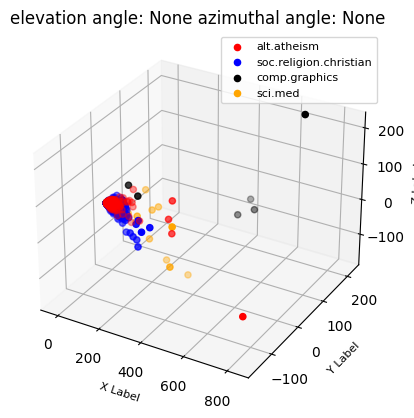

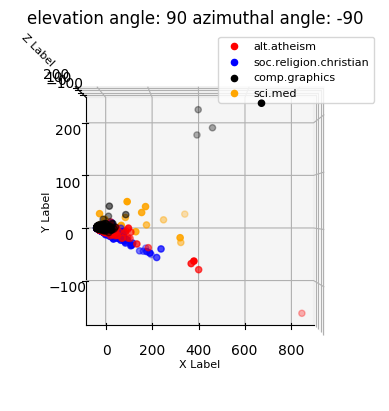

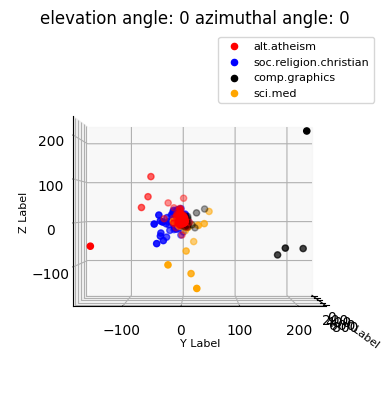

In [114]:
from mpl_toolkits.mplot3d.axes3d import Axes3D
col = ['red', 'blue', 'black', 'orange'] # color for each category

# plot
def plot3D(elev, azim):
    fig = plt.figure()
    ax = fig.add_subplot(projection='3d')
    for c, category in zip(col, categories):
        xs = X_reduced[X['category_name'] == category].T[0]
        ys = X_reduced[X['category_name'] == category].T[1]
        zs = X_reduced[X['category_name'] == category].T[2]
        ax.scatter(xs, ys, zs, c = c, marker='o', label=category)

    ax.legend(fontsize=8)
    ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
    ax.set_xlabel('X Label', fontsize=8)
    ax.set_ylabel('Y Label', fontsize=8)
    ax.set_zlabel('Z Label', fontsize=8)
    ax.set_title(f'elevation angle: {elev} azimuthal angle: {azim}')
    ax.view_init(elev = elev, azim = azim)  # add the camera position; elev: elevation angle; azim: azimuthal angle
    plt.show()


for elev, azim in zip([None, 90, 0], [None, -90, 0]):
    plot3D(elev, azim)

#### From the picture above, we can see that the distribution of each category is different as the elevation and azimuthal angle changing. In addition, it's interesting that the closer(or the higher from the plane in graph) the ppints are, the darker the color is.

In [115]:
# note this takes time to compute. You may want to reduce the amount of terms you want to compute frequencies for
term_frequencies = []
print(X_counts.shape[1])
for j in range(0,X_counts.shape[1]):
    term_frequencies.append(sum(X_counts[:,j].toarray()))

#[3, 8, 5, 2, 5, 8, 2, 5, 3, 2]

35788


In [116]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
term_frequencies[0] # sum of first term: 00

134

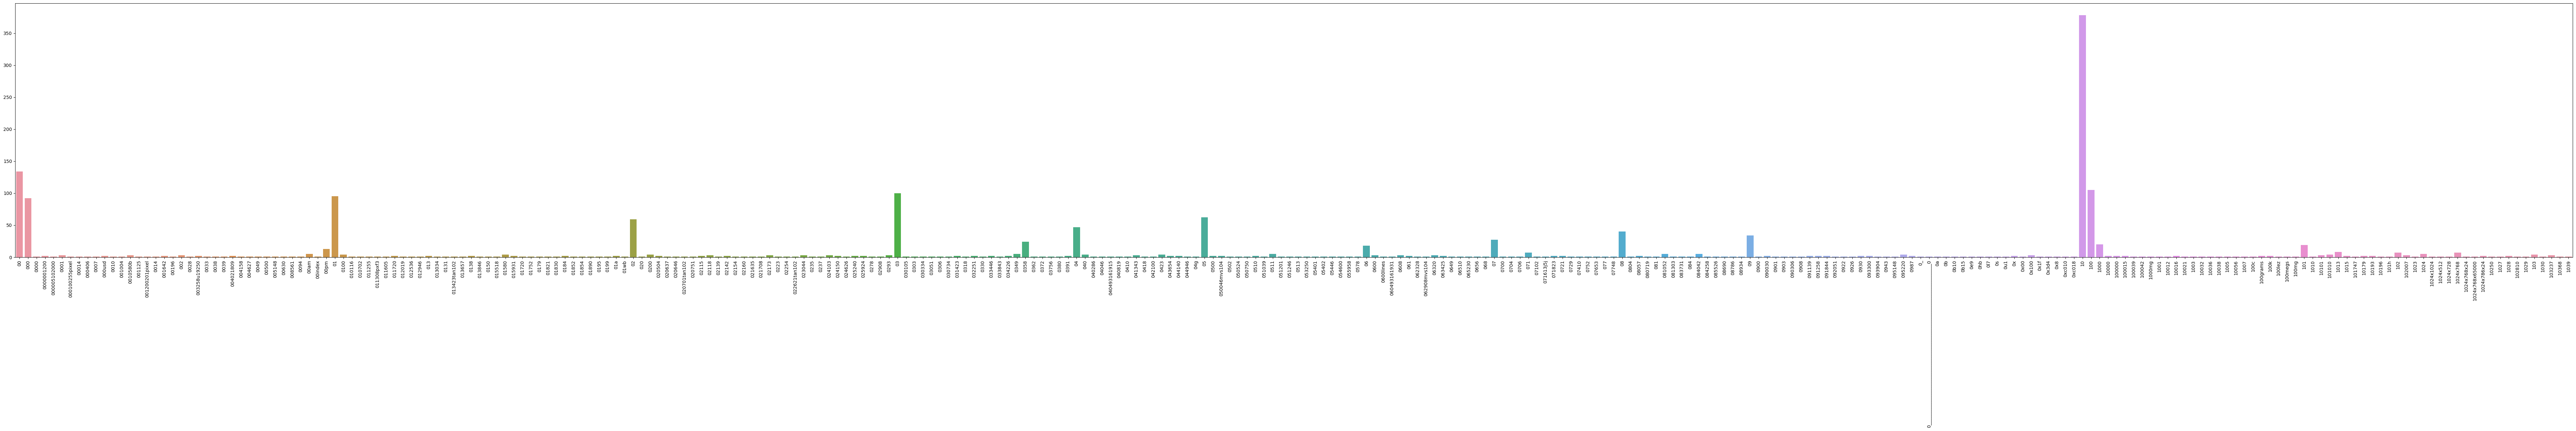

In [117]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

### >>> **Exercise 13 (take home):**
If you want a nicer interactive visualization here, I would encourage you try to install and use plotly to achieve this.

In [118]:
import plotly.express as px
import plotly.graph_objects as go

In [119]:
fig = px.bar(x=count_vect.get_feature_names_out()[:300], y=term_frequencies[:300])
fig.show()

#### Here I use plotly instead of seaborn and matplotlib, and it's clearer now.

### >>> **Exercise 14 (take home):** 
The chart above only contains 300 vocabulary in the documents, and it's already computationally intensive to both compute and visualize. Can you efficiently reduce the number of terms you want to visualize as an exercise. 


In [120]:
term_frequencies = np.asarray(X_counts.sum(axis=0))[0]
print(term_frequencies.shape)

(35788,)


In [121]:
percentage = 99.9
threshold = np.percentile(term_frequencies, percentage)
print(threshold)

2197.8990000000776


In [122]:
X_count_partial = np.array(count_vect.get_feature_names_out())[term_frequencies >= threshold]
term_frequencies_partial = term_frequencies[term_frequencies >= threshold]

In [123]:
# use plotly to plot the bar chart with dark theme
import plotly.express as px
import plotly.graph_objects as go

# plot and set the color to be the term frequency
fig = px.bar(x=X_count_partial, y=term_frequencies_partial, color=term_frequencies_partial)
fig.show()

# fig = px.bar(x=X_count_partial, y=term_frequencies_partial, color=term_frequencies_partial)
# fig.show()

#### Here, I only visualize the first top 0.1% frequently words in the vocabulary by 'np.percentile' and the parameter 'percentage'.

### >>> **Exercise 15 (take home):** 
Additionally, you can attempt to sort the terms on the `x-axis` by frequency instead of in alphabetical order. This way the visualization is more meaninfgul and you will be able to observe the so called [long tail](https://en.wikipedia.org/wiki/Long_tail) (get familiar with this term since it will appear a lot in data mining and other statistics courses). see picture below

![alt txt](https://upload.wikimedia.org/wikipedia/commons/thumb/8/8a/Long_tail.svg/1000px-Long_tail.svg.png)

In [124]:
# sort X_count_partial and term_frequencies_partial by term_frequencies_partial in descending order
X_count_partial_sort = X_count_partial[np.argsort(term_frequencies_partial)][::-1]
term_frequencies_partial_sort = np.sort(term_frequencies_partial)[::-1]
print(len(X_count_partial_sort), len(term_frequencies_partial_sort))
fig = px.bar(x=X_count_partial_sort, y=term_frequencies_partial_sort, color=term_frequencies_partial_sort)
fig.show()

36 36


#### Here, I sort the top 0.1% frequently words in the vocabulary by their frequency and visualize them. We can see the 'long tail' in the picture as well. If the percentage becomes larger, the 'long tail' will be more significant.

### >>> **Exercise 16 (take home):**
Try to generate the binarization using the `category_name` column instead. Does it work?

In [125]:
from sklearn import preprocessing, metrics, decomposition, pipeline, dummy
mlb = preprocessing.LabelBinarizer()

In [126]:
mlb.fit(X.category_name)
X['binary_category_name'] = mlb.transform(X['category_name']).tolist()
X.head()

,text,category,category_name,unigrams,binary_category_name
0,From: sd345@city.ac.uk (Michael Collier) Subje...,1,comp.graphics,"[From, :, sd345, @, city.ac.uk, (, Michael, Co...","[0, 1, 0, 0]"
1,From: ani@ms.uky.edu (Aniruddha B. Deglurkar) ...,1,comp.graphics,"[From, :, ani, @, ms.uky.edu, (, Aniruddha, B....","[0, 1, 0, 0]"
2,From: djohnson@cs.ucsd.edu (Darin Johnson) Sub...,3,soc.religion.christian,"[From, :, djohnson, @, cs.ucsd.edu, (, Darin, ...","[0, 0, 0, 1]"
3,From: s0612596@let.rug.nl (M.M. Zwart) Subject...,3,soc.religion.christian,"[From, :, s0612596, @, let.rug.nl, (, M.M, ., ...","[0, 0, 0, 1]"
4,From: stanly@grok11.columbiasc.ncr.com (stanly...,3,soc.religion.christian,"[From, :, stanly, @, grok11.columbiasc.ncr.com...","[0, 0, 0, 1]"


#### We can see that LabelBinarizer() also works on category_name column.

## Task 2
### New dataset preprocessing

### Load and combine the datasets

In [127]:
import os, glob
from pathlib import Path
path = Path('./sentiment labelled sentences')
# get all the text file in the new data folder
file_list = list(path.glob("*.txt"))
print(file_list)

[WindowsPath('sentiment labelled sentences/amazon_cells_labelled.txt'), WindowsPath('sentiment labelled sentences/imdb_labelled.txt'), WindowsPath('sentiment labelled sentences/yelp_labelled.txt')]


In [128]:
# read a file line by line and append to the list
sentence, score, file = [], [], []
for filepath in file_list:
    with open(filepath, 'r') as f:
        # read line by line
        for line in f:
            # split the line by tab
            sentence.append(line.strip().split('\t')[0])
            score.append(line.strip().split('\t')[1])
            file.append(filepath.name)

In [129]:
print(len(sentence), len(score), len(file))

3000 3000 3000


In [130]:
# create a dataframe 
df = pd.DataFrame({'sentence': sentence, 'score': score, 'file': file})
print(df.shape)
df.head()

(3000, 3)


,sentence,score,file
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt
2,Great for the jawbone.,1,amazon_cells_labelled.txt
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt
4,The mic is great.,1,amazon_cells_labelled.txt


In [131]:
df.isnull().apply(lambda x: dmh.check_missing_values(x))

,sentence,score,file
0,The amoung of missing records is:,The amoung of missing records is:,The amoung of missing records is:
1,0,0,0


#### Luckily, there is no missing value in the dataset, so we don't need to deal with it.

In [132]:
# check the duplicated rows
dupli_df = df[df.duplicated()]
print(dupli_df.shape)
# drop the duplicated rows from the dataframe
df = df.drop_duplicates()
print(df.shape)

(17, 3)
(2983, 3)


### Data preprocessing
#### Sampling

In [133]:
print(df.shape)
df_sample = df.sample(n=1000, random_state=42)
df_plot = df.score.value_counts()

df_amazon = df_sample[df_sample['file'] == 'amazon_cells_labelled.txt'].score.value_counts()
df_yelp = df_sample[df_sample['file'] == 'yelp_labelled.txt'].score.value_counts()
df_imdb = df_sample[df_sample['file'] == 'imdb_labelled.txt'].score.value_counts()
df_sample_plot = df_sample.score.value_counts()

print(df_plot)
print(df_amazon)
print(df_yelp)
print(df_imdb)
print(df_sample_plot)


(2983, 3)
0    1493
1    1490
Name: score, dtype: int64
1    173
0    173
Name: score, dtype: int64
0    166
1    166
Name: score, dtype: int64
0    167
1    155
Name: score, dtype: int64
0    506
1    494
Name: score, dtype: int64


<AxesSubplot: title={'center': 'Score distribution'}>

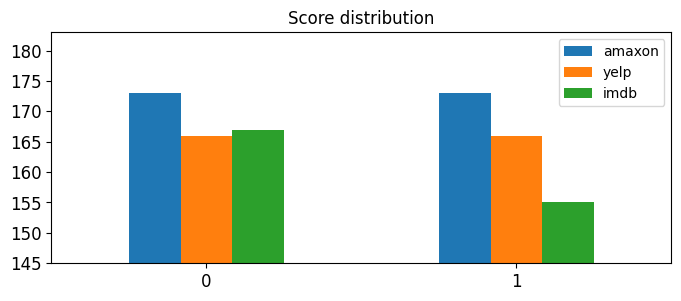

In [134]:
# plot with pandas with source and score
a = pd.DataFrame({'amaxon': df_amazon,
                  'yelp': df_yelp,
                  'imdb': df_imdb})
maximum = max(max(df_amazon), max(df_yelp), max(df_imdb))
minimum = min(min(df_amazon), min(df_yelp), min(df_imdb))       
lower_bound = minimum - 10
upper_bound = maximum + 10
a.plot(kind = 'bar',
        title = 'Score distribution',
        ylim = [lower_bound, upper_bound],
        rot = 0, fontsize = 12, figsize = (8,3))

#### Feature Creation

In [135]:
import nltk
df['unigrams'] = df['sentence'].apply(lambda x: dmh.tokenize_text(x))
df[:4]['unigrams']

0    [So, there, is, no, way, for, me, to, plug, it...
1                 [Good, case, ,, Excellent, value, .]
2                        [Great, for, the, jawbone, .]
3    [Tied, to, charger, for, conversations, lastin...
Name: unigrams, dtype: object

#### Feature Subset Selection

In [136]:
from sklearn.feature_extraction.text import CountVectorizer

count_vect = CountVectorizer()
df_counts = count_vect.fit_transform(df.sentence)
print(df_counts[0])

  (0, 4161)	1
  (0, 4545)	1
  (0, 2427)	1
  (0, 3043)	1
  (0, 4987)	1
  (0, 1829)	1
  (0, 2809)	1
  (0, 4609)	1
  (0, 3387)	1
  (0, 2432)	1
  (0, 2314)	2
  (0, 2158)	1
  (0, 4531)	1
  (0, 4835)	1
  (0, 4793)	1
  (0, 1982)	1
  (0, 647)	1
  (0, 1013)	1


In [137]:
# check whether the content of unigram in first row is the same as the first row in df
for tup in df_counts[0]:
    print(type(tup))
print(count_vect.get_feature_names_out()[4161])
print(count_vect.get_feature_names_out()[4545])
print(count_vect.get_feature_names_out()[2427])

<class 'scipy.sparse._csr.csr_matrix'>
so
there
is


In [138]:
analyze = count_vect.build_analyzer()
analyze("I am craving for a hawaiian pizza right now")

['am', 'craving', 'for', 'hawaiian', 'pizza', 'right', 'now']

In [139]:
# we can see that df_counts is a large and sparse matrix as well
print(df_counts.shape)

(2983, 5155)


In [140]:
count_vect.get_feature_names_out()[0:10]

array(['00', '10', '100', '11', '12', '13', '15', '15g', '15pm', '17'],
      dtype=object)

##### Plot the frequency of the 10 most commonly used terms in the first 5 sentence.

In [141]:
plot_x = ["term_"+str(i) for i in count_vect.get_feature_names_out()]
plot_y = ["sen_"+ str(i) for i in list(df.index)]
plot_z = df_counts.toarray()
df_20 = df[:5]
count_vect_top20 = CountVectorizer(max_features=10)
df_counts_20 = count_vect_top20.fit_transform(df_20.sentence) #learn the vocabulary and return document-term matrix
df_counts_20.shape

(5, 10)

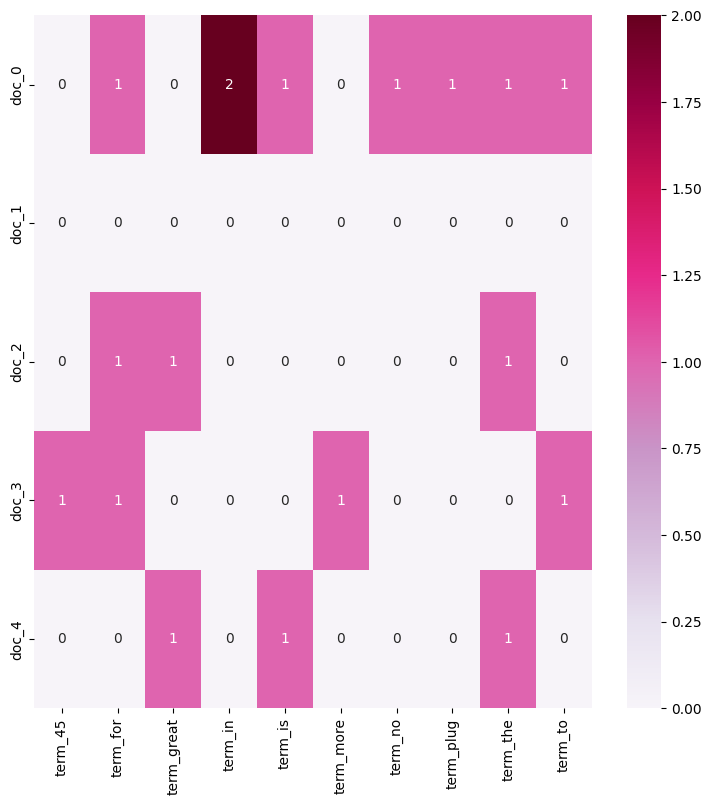

In [142]:
plot_x = ["term_"+str(i) for i in count_vect_top20.get_feature_names_out()]
# obtain document index
plot_y = ["doc_"+ str(i) for i in list(df_20.index)]
# obtain document features
plot_z = df_counts_20.toarray()

df_todraw = pd.DataFrame(plot_z, columns = plot_x, index = plot_y)
plt.subplots(figsize=(9, 9))
ax = sns.heatmap(df_todraw,
                 cmap="PuRd",
                 vmin=0, vmax=2, annot=True)

#### Dimensionality Reduction

In [143]:
df_reduced = PCA(n_components = 2).fit_transform(df_counts.toarray())
print(df_reduced.shape)

(2983, 2)


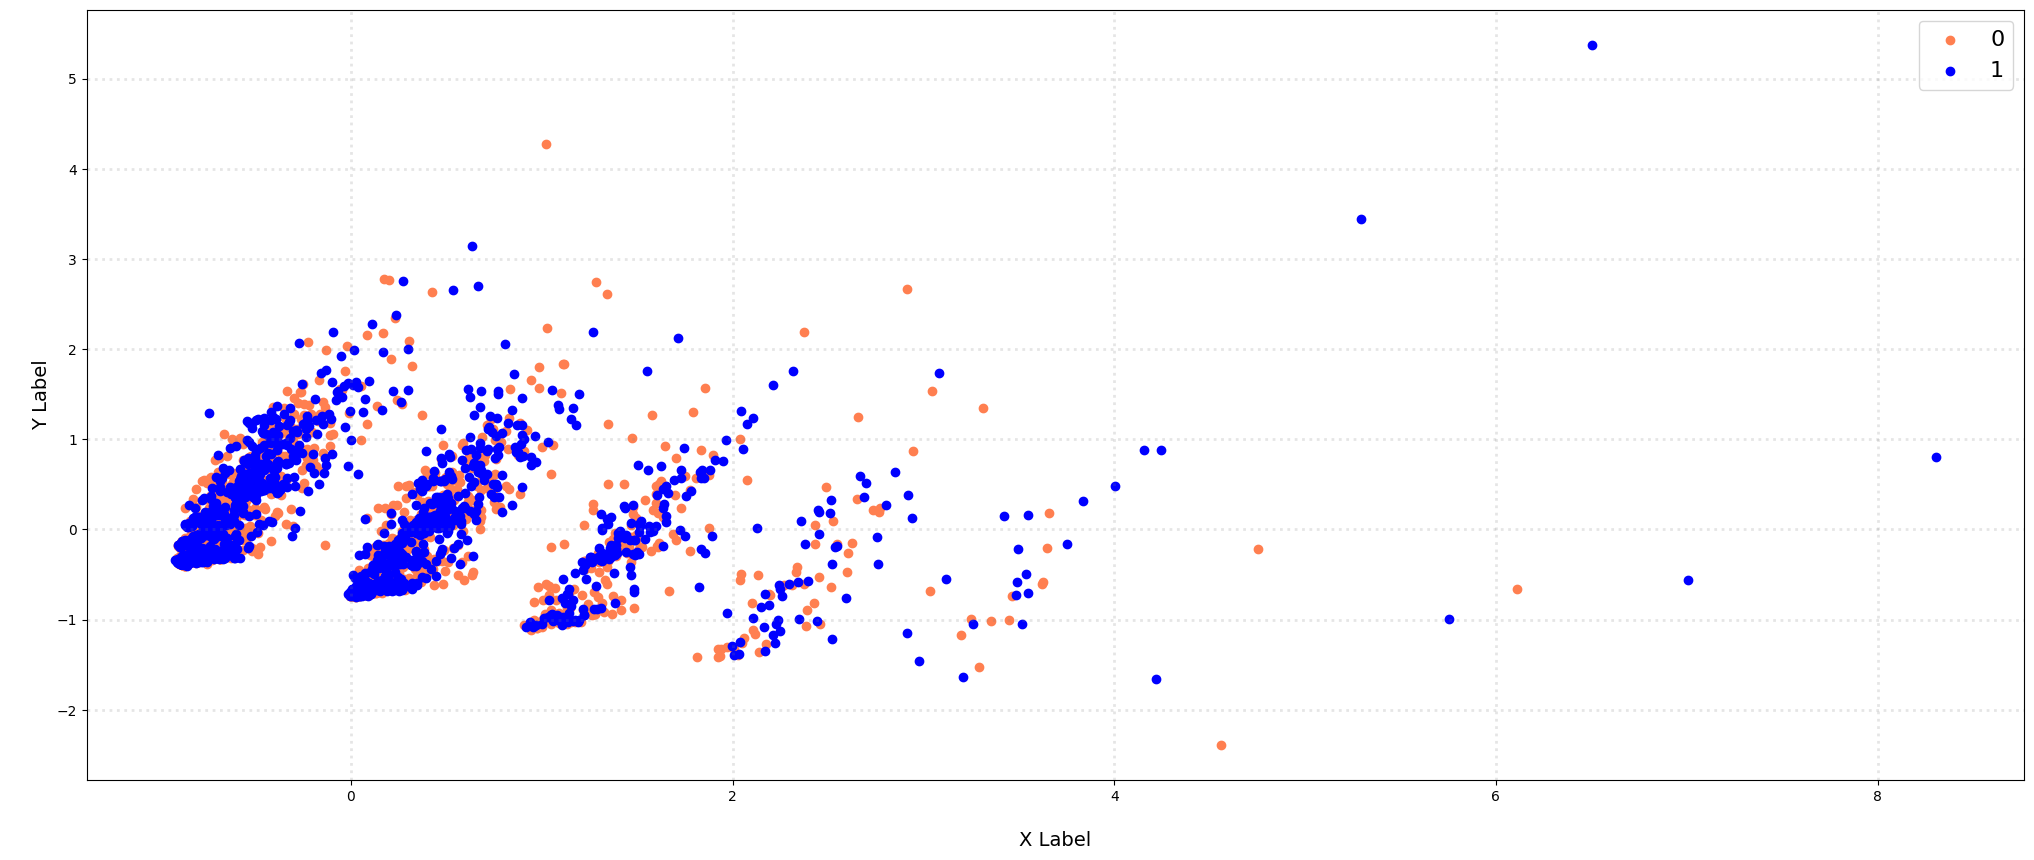

In [144]:
col = ['coral', 'blue']
scores = ['0', '1']
# plot
fig = plt.figure(figsize = (25,10))
ax = fig.subplots()

for c, score in zip(col, scores):
    xs = df_reduced[df['score'] == score].T[0]
    ys = df_reduced[df['score'] == score].T[1]
    ax.scatter(xs, ys, c = c, marker='o', label = score)

ax.legend(fontsize=16)
ax.grid(color='gray', linestyle=':', linewidth=2, alpha=0.2)
ax.set_xlabel('\nX Label', fontsize=14)
ax.set_ylabel('\nY Label', fontsize=14)

plt.show()

#### Attribute Transformation / Aggregation

In [145]:
term_frequencies = []
print(df_counts.shape[1])
for j in range(0,df_counts.shape[1]):
    term_frequencies.append(sum(df_counts[:,j].toarray()))

5155


In [146]:
term_frequencies = np.asarray(df_counts.sum(axis=0))[0]
term_frequencies[4161] #sum of first word in the first sentence: 'so'

171

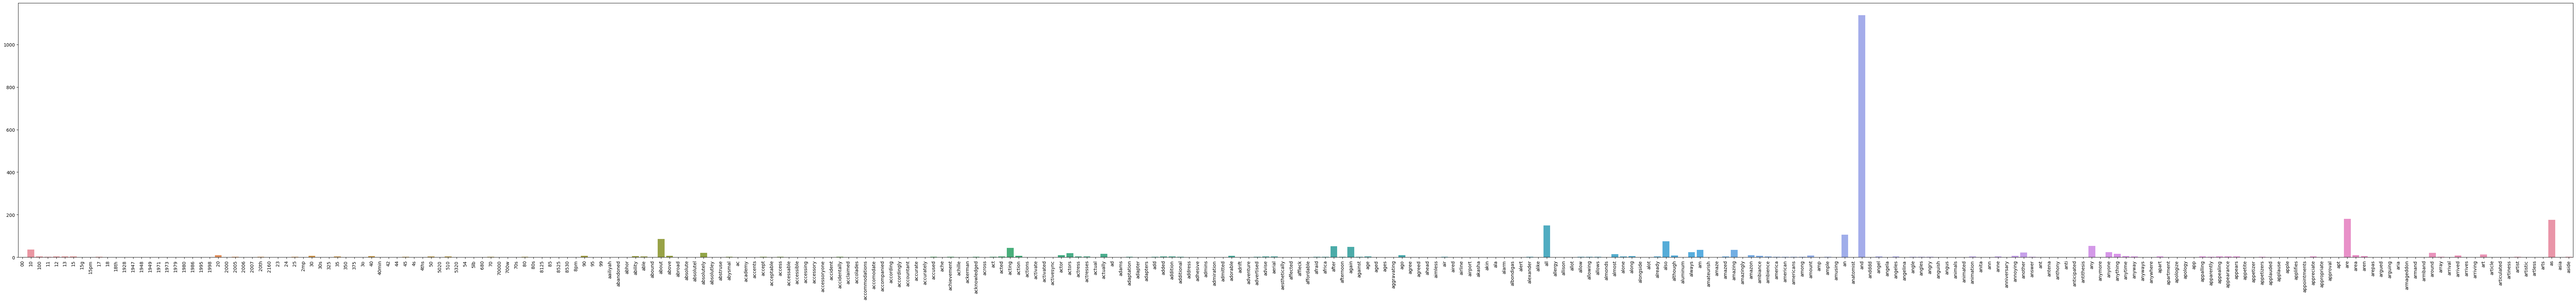

In [147]:
plt.subplots(figsize=(100, 10))
g = sns.barplot(x=count_vect.get_feature_names_out()[:300], 
            y=term_frequencies[:300])
g.set_xticklabels(count_vect.get_feature_names_out()[:300], rotation = 90);

In [148]:
# show the top 1% most frequent terms, 52 terms in this case

import plotly.express as px
import plotly.graph_objects as go


percentage = 99
threshold = np.percentile(term_frequencies, percentage)
print(threshold)

df_count_partial = np.array(count_vect.get_feature_names_out())[term_frequencies >= threshold]
term_frequencies_partial = term_frequencies[term_frequencies >= threshold]
# plot and set the color to be the term frequency
fig = px.bar(x=df_count_partial, y=term_frequencies_partial, color=term_frequencies_partial)
fig.show()

84.46000000000004


In [149]:
# sort X_count_partial and term_frequencies_partial by term_frequencies_partial in descending order
df_count_partial_sort = df_count_partial[np.argsort(term_frequencies_partial)][::-1]
term_frequencies_partial_sort = np.sort(term_frequencies_partial)[::-1]
print(len(df_count_partial_sort), len(term_frequencies_partial_sort))
fig = px.bar(x=df_count_partial_sort, y=term_frequencies_partial_sort, color=term_frequencies_partial_sort)
fig.show()

52 52


#### Discretization and Binarization
##### Since the 'score' is already a binary label, I do one-hot encoding by myself.

In [150]:
df['binary_category_name'] = [[]]*(df.shape[0])
for idx, a_score in enumerate(df['score']):
    if a_score == '0':
        df['binary_category_name'][idx] = [1.0, 0.0]
    else:
        df['binary_category_name'][idx] = [0.0, 1.0]
df.head()

,sentence,score,file,unigrams,binary_category_name
0,So there is no way for me to plug it in here i...,0,amazon_cells_labelled.txt,"[So, there, is, no, way, for, me, to, plug, it...","[1.0, 0.0]"
1,"Good case, Excellent value.",1,amazon_cells_labelled.txt,"[Good, case, ,, Excellent, value, .]","[0.0, 1.0]"
2,Great for the jawbone.,1,amazon_cells_labelled.txt,"[Great, for, the, jawbone, .]","[0.0, 1.0]"
3,Tied to charger for conversations lasting more...,0,amazon_cells_labelled.txt,"[Tied, to, charger, for, conversations, lastin...","[1.0, 0.0]"
4,The mic is great.,1,amazon_cells_labelled.txt,"[The, mic, is, great, .]","[0.0, 1.0]"


#### Data Exploration - Cosine Similarity

In [151]:
# randomly choose 3 numbers from 0 to df.shape[0]
# set the random seed to be 1
np.random.seed(2)
random_index = np.random.randint(0, df.shape[0], 3)

# retrieve 3 sentences randomly
document_to_transform_1 = []
random_record_1 = df.iloc[random_index[0]]
document_to_transform_1.append(random_record_1['sentence'])

document_to_transform_2 = []
random_record_2 = df.iloc[random_index[1]]  
document_to_transform_2.append(random_record_2['sentence'])

document_to_transform_3 = []
random_record_3 = df.iloc[random_index[2]]  
document_to_transform_3.append(random_record_3['sentence'])

In [152]:
print(random_record_1['score'], random_record_2['score'], random_record_3['score'])
print(document_to_transform_1, '\n', document_to_transform_2, '\n', document_to_transform_3)


1 0 1
['My breakfast was perpared great, with a beautiful presentation of 3 giant slices of Toast, lightly dusted with powdered sugar.'] 
 ['However, my recent experience at this particular location was not so good.'] 
 ["This is a masterful piece of film-making, with many themes simmering and occasionally boiling over in this warts and all study of the poet's bohemian, self-indulgent wartime years that span the aerial bombardments of London and the outward tranquillity of a Welsh coastal retreat - the borderlines between friendship, lust and love, dedication to art and experience versus practical concerns, jealousy, rivalry, cowardice and egotism versus heroism and self-sacrifice and more.  "]


In [153]:
from sklearn.preprocessing import binarize
from sklearn.metrics.pairwise import cosine_similarity

# Transform sentence with Vectorizers
document_vector_count_1 = count_vect.transform(document_to_transform_1)
document_vector_count_2 = count_vect.transform(document_to_transform_2)
document_vector_count_3 = count_vect.transform(document_to_transform_3)

# Binarize vectors to simplify: 0 for abscence, 1 for prescence
document_vector_count_1_bin = binarize(document_vector_count_1)
document_vector_count_2_bin = binarize(document_vector_count_2)
document_vector_count_3_bin = binarize(document_vector_count_3)

# Calculate Cosine Similarity
cos_sim_count_1_2 = cosine_similarity(document_vector_count_1, document_vector_count_2, dense_output=True)
cos_sim_count_1_3 = cosine_similarity(document_vector_count_1, document_vector_count_3, dense_output=True)
cos_sim_count_2_3 = cosine_similarity(document_vector_count_2, document_vector_count_3, dense_output=True)

cos_sim_count_1_1 = cosine_similarity(document_vector_count_1, document_vector_count_1, dense_output=True)
cos_sim_count_2_2 = cosine_similarity(document_vector_count_2, document_vector_count_2, dense_output=True)
cos_sim_count_3_3 = cosine_similarity(document_vector_count_3, document_vector_count_3, dense_output=True)


print("Cosine Similarity using count bw 1 and 2: %(x)f" %{"x":cos_sim_count_1_2})
print("Cosine Similarity using count bw 1 and 3: %(x)f" %{"x":cos_sim_count_1_3})
print("Cosine Similarity using count bw 2 and 3: %(x)f" %{"x":cos_sim_count_2_3})

print("Cosine Similarity using count bw 1 and 1: %(x)f" %{"x":cos_sim_count_1_1})
print("Cosine Similarity using count bw 2 and 2: %(x)f" %{"x":cos_sim_count_2_2})
print("Cosine Similarity using count bw 3 and 3: %(x)f" %{"x":cos_sim_count_3_3})

Cosine Similarity using count bw 1 and 2: 0.123091
Cosine Similarity using count bw 1 and 3: 0.170153
Cosine Similarity using count bw 2 and 3: 0.069116
Cosine Similarity using count bw 1 and 1: 1.000000
Cosine Similarity using count bw 2 and 2: 1.000000
Cosine Similarity using count bw 3 and 3: 1.000000


#### From the cosine similarity above, we can see that the sentences in the same category are more similar to each other than the sentences in different categories, which are 1 & 3 sentences in this case. However, this may not be the best way to show the similarity between sentences, since the sentences in the same category are not always similar to each other. If the sentences express in totally different words, the cosine similarity will be closed to zero in this way even though they are in the same category.

## Task 3

### Generate meaningful new data visualizations
#### First, I use wordcloud to visualize the most frequently words in the dataset. 

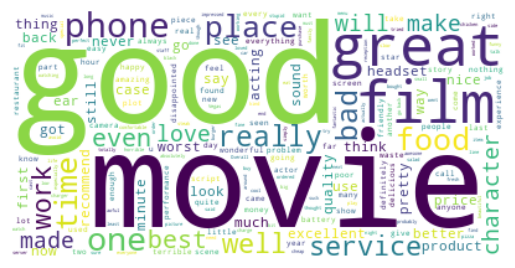

In [154]:
from wordcloud import WordCloud, STOPWORDS
import matplotlib.pyplot as plt

# Generate a word cloud image
text = " ".join(i for i in df['sentence'])
wordcloud = WordCloud(background_color="white").generate(text)

# plot
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()


#### In addition, I compute bigram from new dataset to obtain PMI score of each bigram. Then, I visualize the top 50 bigrams with the highest PMI score on the Network graph. The thickness of each edge represents the PMI score of the bigram. The higher the PMI score is, the thicker the edge is.

#### PMI(Pointwise Mutual Information) can be computed by the following formula: (P(x,y)) = log(P(x,y)/(P(x)*P(y))). P(x) represents the probability of term x appears in new dataset, and P(x,y) represents the probability of bigram (x, y) appears in new dataset.

In [155]:
word = "is"
index = list(count_vect.get_feature_names_out()).index(word)

word_count = df_counts[:, index].sum()
total_word_count = df_counts.sum()

print(f"The word '{word}' appears {word_count} times in the documents. ")

The word 'is' appears 752 times in the documents. 


In [156]:
from nltk import bigrams
from collections import Counter

# Create a list of bigrams
terms_bigram = [list(bigrams(tweet)) for tweet in df['unigrams']]
# View bigrams for the first tweet
print(terms_bigram[0])

# Flatten list of bigrams in clean tweets
bigrams = [item for sublist in terms_bigram for item in sublist]
# Create counter of words in clean bigrams
bigram_counts = Counter(bigrams)
all_bigram = [tup for tup in bigram_counts]

[('So', 'there'), ('there', 'is'), ('is', 'no'), ('no', 'way'), ('way', 'for'), ('for', 'me'), ('me', 'to'), ('to', 'plug'), ('plug', 'it'), ('it', 'in'), ('in', 'here'), ('here', 'in'), ('in', 'the'), ('the', 'US'), ('US', 'unless'), ('unless', 'I'), ('I', 'go'), ('go', 'by'), ('by', 'a'), ('a', 'converter'), ('converter', '.')]


In [157]:
word1 = 'so'
word2 = 'there'

def computePMI(word1, word2):
    if (word1, word2) in all_bigram:
        index1 = list(count_vect.get_feature_names_out()).index(word1)
        word_count1 = df_counts[:, index1].sum()
        index2 = list(count_vect.get_feature_names_out()).index(word2)
        word_count2 = df_counts[:, index2].sum()
        bigram_count = bigram_counts[(word1, word2)]
        # print(word_count1, word_count2, bigram_count)
        # comput the PMI
        p1 = word_count1/total_word_count
        p2 = word_count2/total_word_count
        p1_p2 = bigram_count/total_word_count
        pmi = np.log2(p1_p2/(p1*p2))
        # print(f"The PMI of the bigram '{word1} {word2}' is {pmi}.") 
        return pmi

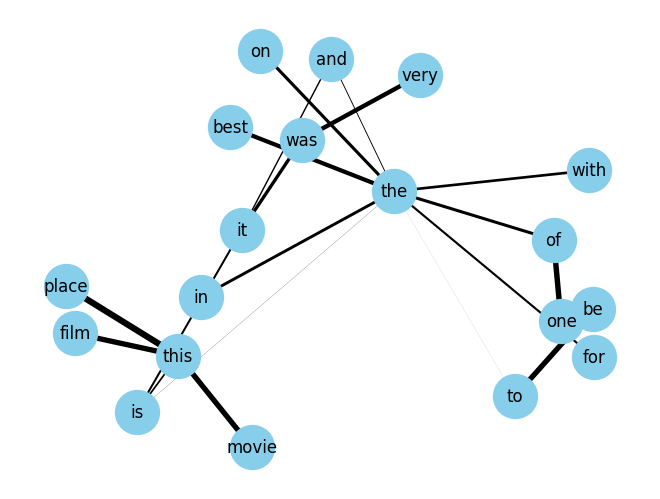

In [158]:
# use NetworkX to visualize the bigram network

from tqdm import tqdm
import networkx as nx
import matplotlib.pyplot as plt

# Create a network graph object
G = nx.Graph()

for (term1, term2), weight in bigram_counts.most_common(50):
    try:
        G.add_edge(term1, term2, weight=computePMI(term1, term2))
    except:
        pass
        # print((term1, term2), "does not appear in count_vector")

pos = nx.spring_layout(G, k=1)  # 使用Force-directed布局
edges = G.edges(data=True)

nx.draw(G, pos, with_labels=True, node_size=1000,node_color="skyblue", 
        width=[w[2]['weight'] for w in edges])


### TF-IDF

In [159]:
from sklearn.feature_extraction.text import TfidfVectorizer
tf_transformer = TfidfVectorizer()
tfidf_matrix = tf_transformer.fit_transform(df.sentence)
print(tfidf_matrix.shape)


(2983, 5155)


In [160]:
terms = tf_transformer.get_feature_names_out()

# sum tfidf frequency of each term through documents
sums = tfidf_matrix.sum(axis=0)

In [161]:
row = []
for i in range(tfidf_matrix.shape[0]):
    row.append("sentence_"+str(i))

In [162]:
df_tfidf = pd.DataFrame(tfidf_matrix.toarray(), columns = terms, index = row)
print(df_tfidf.shape)

(2983, 5155)


In [163]:
df_tfidf.head()

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
sentence_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Here, we successfully obtain a TF-IDF term-document matrix. Each row represents a sentence, and each column represents TF_IDF score in each sentence. 

### Naive Bayes Classifier
#### Word Frequency Features

In [164]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import GridSearchCV
from sklearn.naive_bayes import MultinomialNB

In [165]:
df_counts.toarray().shape
row = []
for i in range(df_counts.toarray().shape[0]):
    row.append("sen_"+str(i))
df_term_freq_X = pd.DataFrame(df_counts.toarray(), columns=count_vect.get_feature_names_out(), index = row)
df_term_freq_y = pd.DataFrame(df['score'], columns = ['score']).values.ravel()


In [166]:
X_train, X_test, y_train, y_test = train_test_split(df_term_freq_X, df_term_freq_y, test_size = 0.3, stratify = df_term_freq_y)

param_grid = {}
param_grid['alpha'] = [ 0.1, 1.0, 1.5, 2.0]
model = MultinomialNB()
kfold = KFold(n_splits = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = kfold)
grid_result = grid.fit(X = X_train, y = y_train)
print('best acc: %.3f with %s' % (grid_result.best_score_, grid_result.best_params_))


best acc: 0.818 with {'alpha': 1.0}


#### TF-IDF Features

In [167]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf, df_term_freq_y, test_size = 0.3, stratify = df_term_freq_y)
# Naive Bayes
param_grid = {}
param_grid['alpha'] = [ 0.1, 1.0, 1.5, 2.0]
model = MultinomialNB()
kfold = KFold(n_splits = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = kfold)
grid_result = grid.fit(X = X_train, y = y_train)
print('best acc: %.3f with %s' % (grid_result.best_score_, grid_result.best_params_))


best acc: 0.812 with {'alpha': 1.5}


#### From the result of two classifiers, we can see that there is no difference between their accuracy. In other words, computing TF-IDF may have similar effect as computing word frequency in this case.

## Part 4

#### 1. In Part 1 exercise 11, I use function 'spy' to visualize the sparsity of the matrix. It's really helpful to take a look at the sparsity and distribution of the matrix. I use four different precisions and colors to show the sparsity of the matrix. The higher the precision is, the more points will be shown. From the pictures below, we can see that the sparsity of the matrix is really high, and the distribution of the matrix is not uniform.

#### 2. I use bigram, PMI and NetworkX to strongly demonstrate the relationship between two terms for every bigram. The thickness of each edge represents the PMI score of the bigram. The higher the PMI score is, the thicker the edge is. Also, we can directly get the PMI score to see whether two terms are strong correlation.

#### 3. I tried to remove stopwords to do Naive Bayes classifier with both term frequency and TF-IDF again. Addtionally, I plot the bar plot in descending order again to see the most common words in this dataset. 

In [168]:
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_eng = stopwords.words('english')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\andre\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


In [169]:
import string
df['remove stopwords'] = df['unigrams'].apply(lambda x: [item for item in x if (item.lower() not in stopwords_eng and item.lower() not in string.punctuation)])
# turn into string and use' ' to seperate each terms
df['remove stopwords'] = [' '.join(map(str, l)) for l in df['remove stopwords']]

In [170]:
tfidf_matrix_RS = tf_transformer.fit_transform(df["remove stopwords"])
terms = tf_transformer.get_feature_names_out()
sums = tfidf_matrix_RS.sum(axis=0)
row = []
for i in range(tfidf_matrix_RS.shape[0]):
    row.append("sentence_"+str(i))
# TF-IDF features
df_tfidf_RS = pd.DataFrame(tfidf_matrix_RS.toarray(), columns = terms, index = row)
df_tfidf_RS.head()

,00,10,100,11,12,13,15,15g,15pm,17,...,yucky,yukon,yum,yummy,yun,z500a,zero,zillion,zombie,zombiez
sentence_0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence_1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence_2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence_3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
sentence_4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


#### Originally, the dimension of each row is 5155. Here I remove 97 stopwords. Let's see whether there is any difference after removing stopwords.

In [171]:
count_vect = CountVectorizer()
df_counts_RS = count_vect.fit_transform(df['remove stopwords'])
print(df_counts_RS[0])

  (0, 4907)	1
  (0, 3325)	1
  (0, 4758)	1
  (0, 4717)	1
  (0, 1952)	1
  (0, 996)	1


In [172]:
df_counts_RS.toarray().shape
row = []
for i in range(df_counts_RS.toarray().shape[0]):
    row.append("sen_"+str(i))
df_term_freq_X = pd.DataFrame(df_counts_RS.toarray(), columns=count_vect.get_feature_names_out(), index = row)
df_term_freq_y = pd.DataFrame(df['score'], columns = ['score']).values.ravel()

In [173]:
X_train, X_test, y_train, y_test = train_test_split(df_term_freq_X, df_term_freq_y, test_size = 0.3, stratify = df_term_freq_y)

param_grid = {}
param_grid['alpha'] = [ 0.1, 1.0, 1.5, 2.0]
model = MultinomialNB()
kfold = KFold(n_splits = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = kfold)
grid_result = grid.fit(X = X_train, y = y_train)
print('best acc of term frequency classifier: %.3f with %s' % (grid_result.best_score_, grid_result.best_params_))


best acc of term frequency classifier: 0.804 with {'alpha': 1.5}


In [174]:
X_train, X_test, y_train, y_test = train_test_split(df_tfidf_RS, df_term_freq_y, test_size = 0.3, stratify = df_term_freq_y)
# Naive Bayes
param_grid = {}
param_grid['alpha'] = [ 0.1, 1.0, 1.5, 2.0]
model = MultinomialNB()
kfold = KFold(n_splits = 10)
grid = GridSearchCV(estimator = model, param_grid = param_grid, scoring = 'accuracy', cv = kfold)
grid_result = grid.fit(X = X_train, y = y_train)
print('best acc TF-IDF classifier: %.3f with %s' % (grid_result.best_score_, grid_result.best_params_))


best acc TF-IDF classifier: 0.803 with {'alpha': 1.0}


#### Unfortunately, the accuracy of two classifiers does not improve after removing stopwords. The reason may be that the stopwords are not the main reason that causes the low accuracy of the classifier. However, after removing stopwords, we can visualize the word frequency with more meaningful words e.g. good, movie, film and so on. 

In [175]:
term_frequencies = np.asarray(df_counts_RS.sum(axis=0))[0]
# show the top 1% most frequent terms, 52 terms in this case

percentage = 99
threshold = np.percentile(term_frequencies, percentage)
print(threshold)

df_count_partial = np.array(count_vect.get_feature_names_out())[term_frequencies >= threshold]
term_frequencies_partial = term_frequencies[term_frequencies >= threshold]
# plot and set the color to be the term frequency
# sort X_count_partial and term_frequencies_partial by term_frequencies_partial in descending order
df_count_partial_sort = df_count_partial[np.argsort(term_frequencies_partial)][::-1]
term_frequencies_partial_sort = np.sort(term_frequencies_partial)[::-1]
print(len(df_count_partial_sort), len(term_frequencies_partial_sort))
fig = px.bar(x=df_count_partial_sort, y=term_frequencies_partial_sort, color=term_frequencies_partial_sort)
fig.show()

36.43000000000029
51 51
